In [1]:
import sys
import os
import pandas as pd
import numpy as np
sys.path.insert(0, r'D:\uni\Masterarbeit\Code\auswertung')
import auswertung_ma
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import special
# from auswertung_ma import f_exp, f_poly, f_poly_long

In [2]:
data1 = {}
p1 = r"D:\Uni\Masterarbeit\Daten\KFC2\1_scenario"

for ho in os.listdir(p1):
#     print(ho)
    if not 'Vorauswertung' in ho:
        n = int(ho.split("_")[1])
        data1[n] = auswertung_ma.Read_HO(os.path.join(p1, ho), 'p', -2, read_tracking=False, read_lp=False)

Lese die TrackingDaten ein...
fertig!
Lese die TrackingDaten ein...
fertig!
Lese die TrackingDaten ein...
fertig!
Lese die TrackingDaten ein...
fertig!
ROBERTWARNUNG: Im Ordner TreePlusC_4.000000_c_320_nodes_1_RandomScenarioCreator_KantenFaktorCreator2_0.00_2.00\simulation_0 gibt es keine results.txt Datei!
ROBERTWARNUNG: Im Ordner TreePlusC_4.000000_c_320_nodes_1_RandomScenarioCreator_KantenFaktorCreator2_0.00_2.00 gibt es keine results.txt Dateien!
ROBERTWARNUNG: Im Ordner TreePlusC_4.000000_c_320_nodes_1_RandomScenarioCreator_KantenFaktorCreator2_0.50_2.00\simulation_1 gibt es keine results.txt Datei!
ROBERTWARNUNG: Im Ordner TreePlusC_4.000000_c_320_nodes_1_RandomScenarioCreator_KantenFaktorCreator2_0.00_2.00\simulation_0 gibt es keine results.txt Datei!
ROBERTWARNUNG: Im Ordner TreePlusC_4.000000_c_320_nodes_1_RandomScenarioCreator_KantenFaktorCreator2_0.00_2.00 gibt es keine results.txt Dateien!
ROBERTWARNUNG: Im Ordner TreePlusC_4.000000_c_320_nodes_1_RandomScenarioCreator_Kante

In [11]:
# fig, ax = plt.subplots(figsize=(16,10))

# for n in sorted(data1.keys()):
#     ax.scatter(data1[n].id_values, data1[n].anteil_ganz_geloest, label=f'N={n}')
    
# ax.set_xlabel('p_k', fontsize=20)
# ax.set_ylabel('$r_{sol}$', fontsize=20)
# ax.set_title('1 Szenario, KFC2(p_k)', fontsize=20)
# ax.legend(fontsize=20)

In [12]:
print(data1[160].m_res['Schranke4b']['ms'])
print(data1[160].m_res['LP_Approx']['ms'])

[159.0, 150.97307232499992, 139.11097713999996, 119.3785940402176, 118.36793198, 117.7223118250001, 117.12400463499995, 115.35485967909104, 114.59542726681812, 114.00732455272737, 113.07149858724983, 111.1985605, 100.14571463666665, 83.71922904333327]
[159.0, 150.97307232499992, 139.11097713999996, 119.37952691652193, 118.36959811749999, 117.72508416000011, 117.12815211499993, 115.36064494454551, 114.6015736870455, 114.01713461136374, 113.08103042324998, 111.2215226725, 100.45031384166673, 84.63155626333341]


Text(0, 0.5, 'Anteil aller Problemstellungen bei denen LP_Approx Schranke4b erreicht')

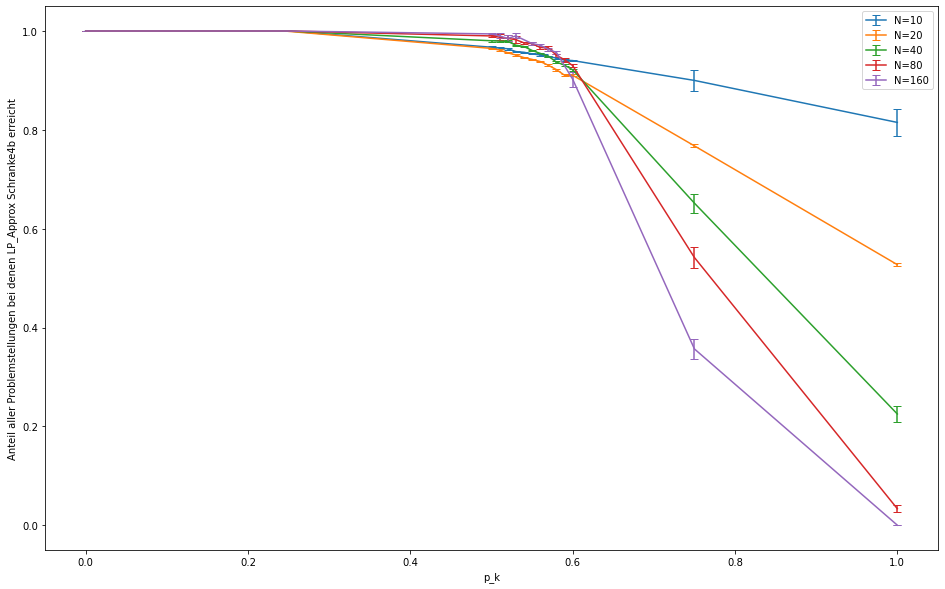

In [34]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.00
alg='LP_Approx'

ns = sorted(data1.keys())
# ns.reverse()
for n in ns[:-1]:
    
#     b_beide, anteile, _ = data5[n].check_alg_vs_schranke4b(alg, alpha)
    
#     sorted_anteile = 
#     b_beide = sorted()
    
    ax.errorbar(*(data1[n].check_alg_vs_schranke4b(alg, alpha)[:-1]), yerr=data1[n].calc_std_deviation(data1[n].check_alg_vs_schranke4b(alg, alpha)[1]), capsize=4, label=f'N={n}')
    
    #ax.scatter(*(data1[n].check_alg_vs_schranke4b(alg, alpha)[:-1]), label=f'N={n}')
    #ax.plot(*data1[n].check_alg_vs_schranke4b(alg, alpha)[:-1], alpha=0.5)

ax.legend()

ax.set_xlabel('p_k')
ax.set_ylabel('Anteil aller Problemstellungen bei denen LP_Approx Schranke4b erreicht')

# ax.set_xlim([0.49,.61])
# ax.set_ylim([0.9, 1.02])
# plt.savefig('pk_uebergang_lp.png')

Der LP-Approx erreicht die Schranke bis zu p_krit, obwohl nicht alle Problemstellungen ganz gelöst werden

Text(0, 0.5, 'Anteil aller Problemstellungen bei denen GreedyLP Schranke4b*1.1 erreicht')

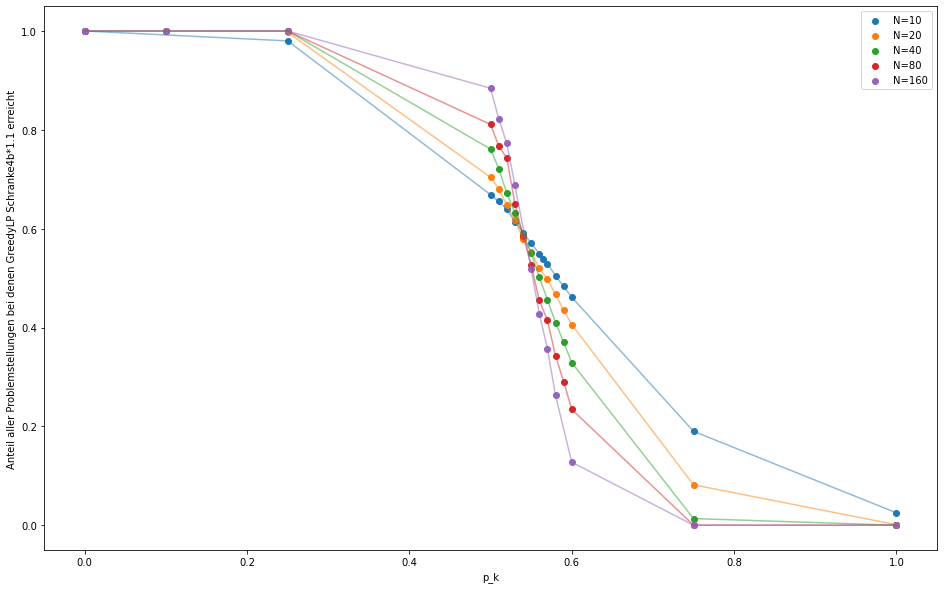

In [37]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.1
alg='Greedy'

ns = sorted(data1.keys())
# ns.reverse()
for n in ns[:-1]:
    
#     b_beide, anteile, _ = data5[n].check_alg_vs_schranke4b(alg, alpha)
    
#     sorted_anteile = 
#     b_beide = sorted()
    
    ax.scatter(*(data1[n].check_alg_vs_schranke4b(alg, alpha)[:-1]), label=f'N={n}')
    ax.plot(*data1[n].check_alg_vs_schranke4b(alg, alpha)[:-1], alpha=0.5)

ax.legend()
ax.set_xlabel('p_k')
ax.set_ylabel(f'Anteil aller Problemstellungen bei denen GreedyLP Schranke4b*{alpha} erreicht')

# ax.set_xlim([0.49,0.61])
# ax.set_ylim([0.9, 1.02])
# plt.savefig('pk_uebergang_greedy.png')

Phasenübergang?

Ab einem bestimmten Prozentsatz an Kanten, die ich verändere, wird das Problem schwerer lösbar. Ist das genau 50%? Ich verändere jedes individuelle Kantengewicht mit dieser Wahrscheinlichkeit, nicht pro Kante. Das ist hier aber äquivalent, weil ich nur 1 Szenario habe!!

Je größer das System wird, desto mehr Kanten hab ich auch. Wenn weniger als 50% aller Kanten verändert werden, dann gilt für die Mehrheit der Kanten noch, dass sie in der ersten Stage 1 und in der 2. 2 Kosten. Es ist die Frage, ob die dann immer genommen werden oder nicht? Es gibt ja auch Kanten, die billiger werden. Reichen diese in Kombination mit den unveränderten immer aus, um einen min Spannbaum komplett in der ersten Phase zu bauen? Vielleicht ist der kritische Punkt aber auch etwas hinter 0.5?

Wie sieht das für 2 oder 5 szenarien aus? Weil dann ist es nicht mehr so eindeutig, da auch nur ein 2.Stage Wert pro Kante verändert werden kann.

Text(0.5, 1.0, 'Loop-Iteration-Skalierung')

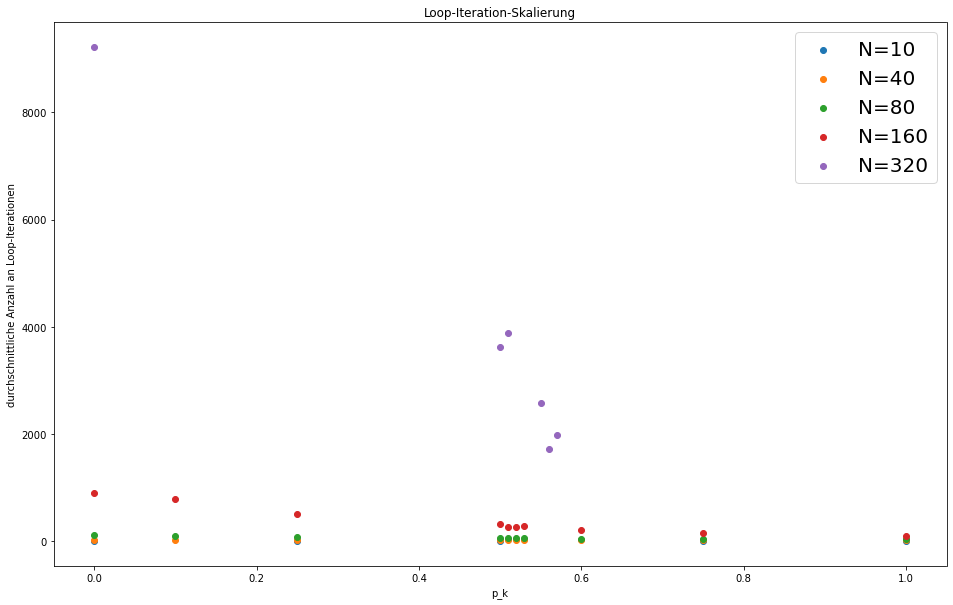

In [32]:
fig, ax = plt.subplots(figsize=(16,10))

for n in sorted(data1.keys()):
    ax.scatter(data1[n].id_values, data1[n].mean_loop_iterations, label=f'N={n}')

ax.legend(fontsize=20)
ax.set_xlabel('p_k')
ax.set_ylabel('durchschnittliche Anzahl an Loop-Iterationen')
ax.set_title('Loop-Iteration-Skalierung')
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_ylim([0,200])

# 2 Szenarien

In [11]:
data2 = {}
p2 = r"D:\Uni\Masterarbeit\Daten\KFC2\2_scenarios"

for ho in os.listdir(p2):
#     print(ho)
    n = int(ho.split("_")[1])
    data2[n] = auswertung_ma.Read_HO(os.path.join(p2, ho), 'p', -2, read_tracking=False)

Lese die TrackingDaten ein...
fertig!
Lese die TrackingDaten ein...
fertig!
Lese die TrackingDaten ein...
fertig!
Lese die TrackingDaten ein...
fertig!


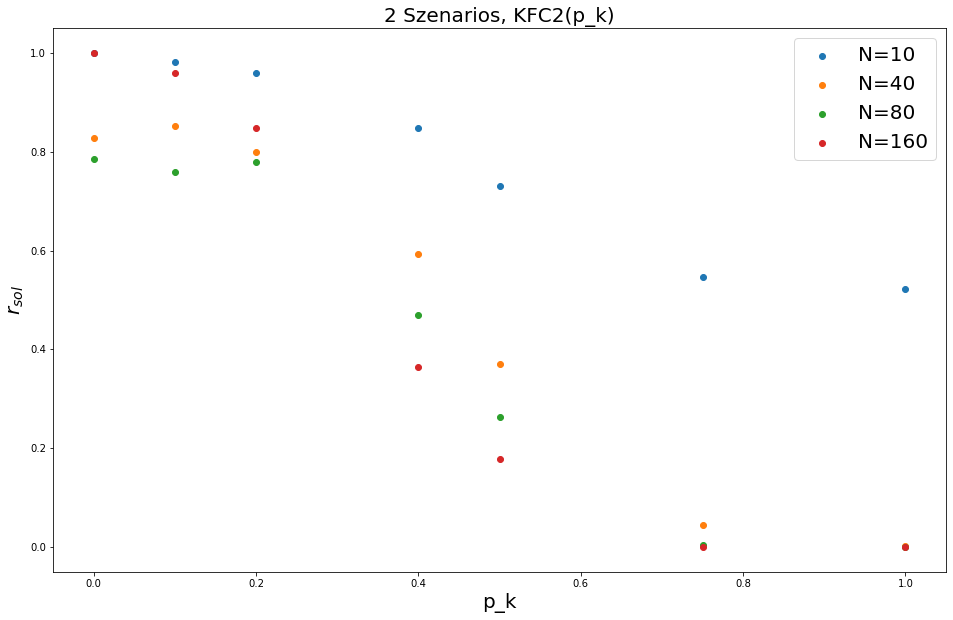

In [12]:
fig, ax = plt.subplots(figsize=(16,10))

for n in sorted(data2.keys()):
    ax.scatter(data2[n].id_values, data2[n].anteil_ganz_geloest, label=f'N={n}')
    
ax.set_xlabel('p_k', fontsize=20)
ax.set_ylabel('$r_{sol}$', fontsize=20)
ax.set_title('2 Szenarios, KFC2(p_k)', fontsize=20)
ax.legend(fontsize=20)

alpha = 1.01, 1.02, 1.03

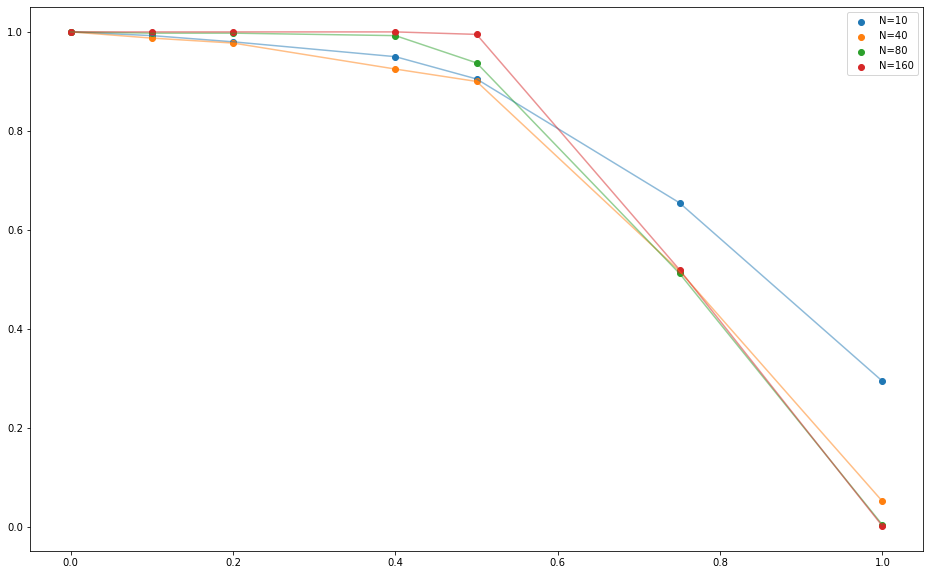

In [25]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.01
alg='LP_Approx'

ns = sorted(data2.keys())
# ns.reverse()
for n in ns[:]:
    
#     b_beide, anteile, _ = data5[n].check_alg_vs_schranke4b(alg, alpha)
    
#     sorted_anteile = 
#     b_beide = sorted()
    
    ax.scatter(*(data2[n].check_alg_vs_schranke4b(alg, alpha)[:-1]), label=f'N={n}')
    ax.plot(*data2[n].check_alg_vs_schranke4b(alg, alpha)[:-1], alpha=0.5)

ax.legend()
# ax.set_xlim([4.9,5.6])
# ax.set_ylim([0.9, 1.02])

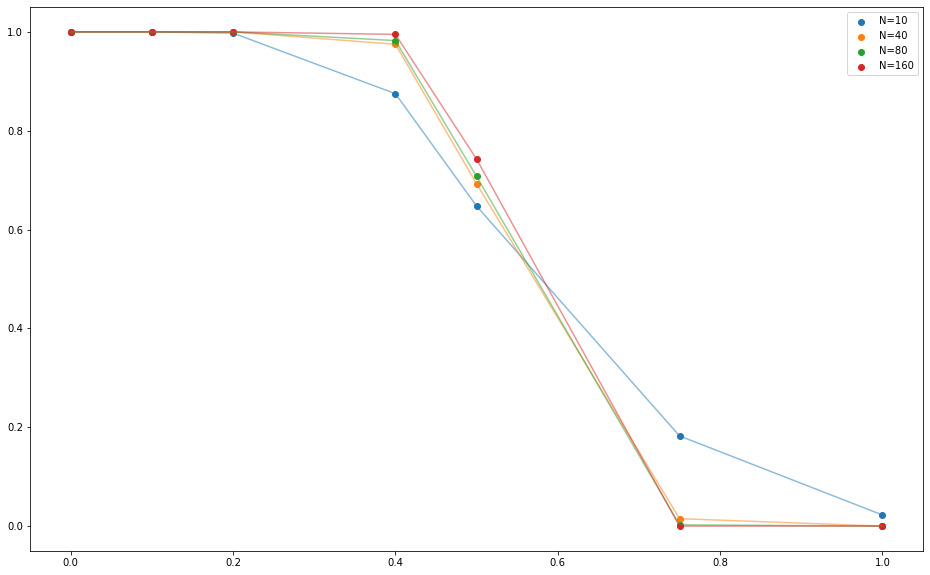

In [22]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.2
alg='Greedy'

ns = sorted(data2.keys())
# ns.reverse()
for n in ns[:]:
    
#     b_beide, anteile, _ = data5[n].check_alg_vs_schranke4b(alg, alpha)
    
#     sorted_anteile = 
#     b_beide = sorted()
    
    ax.scatter(*(data2[n].check_alg_vs_schranke4b(alg, alpha)[:-1]), label=f'N={n}')
    ax.plot(*data2[n].check_alg_vs_schranke4b(alg, alpha)[:-1], alpha=0.5)

ax.legend()
# ax.set_xlim([4.9,5.6])
# ax.set_ylim([0.9, 1.02])

Man kann mit dem Alpha fast beliebig irgendwelche Schnittpunkte erzwingen

# checke, ob wenn k=1 (1 szenario) Schranke und Optimum gleich sind

In [6]:
p_st10 = r"D:\Uni\Masterarbeit\Daten\KFC2\scenario_test_10_nodes_1_scenarios"
p_st20 = r"D:\Uni\Masterarbeit\Daten\KFC2\scenario_test_20_nodes_1_scenarios"

In [16]:
for subfolder in os.listdir(p_st10):
    df = auswertung_ma.read_results(os.path.join(p_st10, subfolder))
    df['diff'] = df['Schranke4b'] - df['Optimum2']
    print(df['diff'].mean())

0.0
0.0
0.0


In [19]:
for subfolder in os.listdir(p_st20):
    df = auswertung_ma.read_results(os.path.join(p_st20, subfolder))
    df['diff'] = df['Schranke4b'] - df['Optimum2']
    print(df['diff'].mean())

0.0
0.0
0.0


Ich schliesse, dass fuer 1 Szenario bestätigt wurde, dass Schranke4b und Optimum übereinstimmen

# neue vorausgewerteten Daten kommen dazu

In [3]:
# lese vorausgewertete Daten ein
pv = r'D:\Uni\Masterarbeit\Daten\KFC2\1_scenario\Vorauswertungen'

data1_vor = {}

for ho in os.listdir(pv):
#     print(ho)
    n = int(ho.split("_")[1])
    data1_vor[n] = auswertung_ma.Read_HO(os.path.join(pv, ho), 'p', -2, read_vorauswertung=True)

(0.86, 0.91)

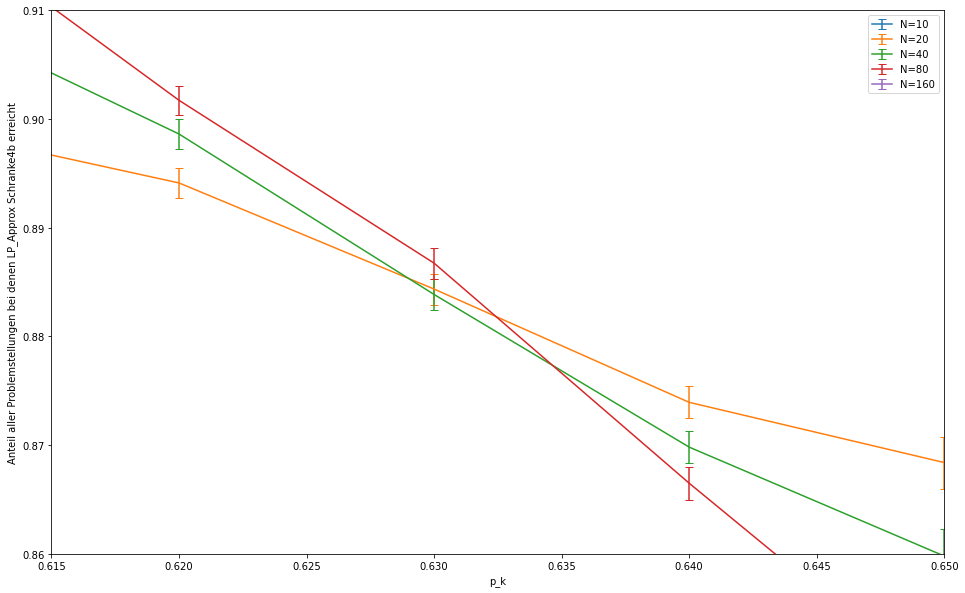

In [12]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.0
alg='LP_Approx'

d_ids = {}
d_props = {}

ns = sorted(data1.keys())[:-1]

for n in ns:
    
    # bringe lokale und vorausgewertete Daten zusammen
    
    ids, prop = data1[n].check_alg_vs_schranke4b(alg, alpha)[:-1]
    std_dev = list(data1[n].calc_std_deviation(data1[n].check_alg_vs_schranke4b(alg, alpha)[1]))
        
    if n in data1_vor.keys():
        ids += data1_vor[n].check_alg_vs_schranke4b(alg, alpha)[0]
        prop += data1_vor[n].check_alg_vs_schranke4b(alg, alpha)[1]
        std_dev += list(data1_vor[n].calc_std_deviation(data1_vor[n].check_alg_vs_schranke4b(alg, alpha)[1]))
    
    # error, falls die selbe ID mehrfach vorkommt
    if len(set(ids)) != len(ids):
        raise ValueError('ROBERTERROR: Ein ID-Wert kommt mehrfach vor!')
    
    # ids sortieren und den rest dazu mit
    
    prop = [t[1] for t in sorted(zip(ids, prop))]
    std_dev = [t[1] for t in sorted(zip(ids, std_dev))]
    
    ids = sorted(ids)
    
    d_ids[n] = ids
    d_props[n] = prop
    
    # berechne den Schnittpunkt
#     print(f'Schnittpunkte: n={n}: {calc_schnittpunkt()}')
    
    ax.errorbar(ids, prop, yerr=std_dev, capsize=4, label=f'N={n}')
    
    #ax.scatter(*(data1[n].check_alg_vs_schranke4b(alg, alpha)[:-1]), label=f'N={n}')
    #ax.plot(*data1[n].check_alg_vs_schranke4b(alg, alpha)[:-1], alpha=0.5)

ax.legend()

ax.set_xlabel('p_k')
ax.set_ylabel('Anteil aller Problemstellungen bei denen LP_Approx Schranke4b erreicht')

ax.set_xlim([0.615,.65])
ax.set_ylim([0.86, 0.91])
# plt.savefig('pk_uebergang_lp.png')

(0.49, 0.81)

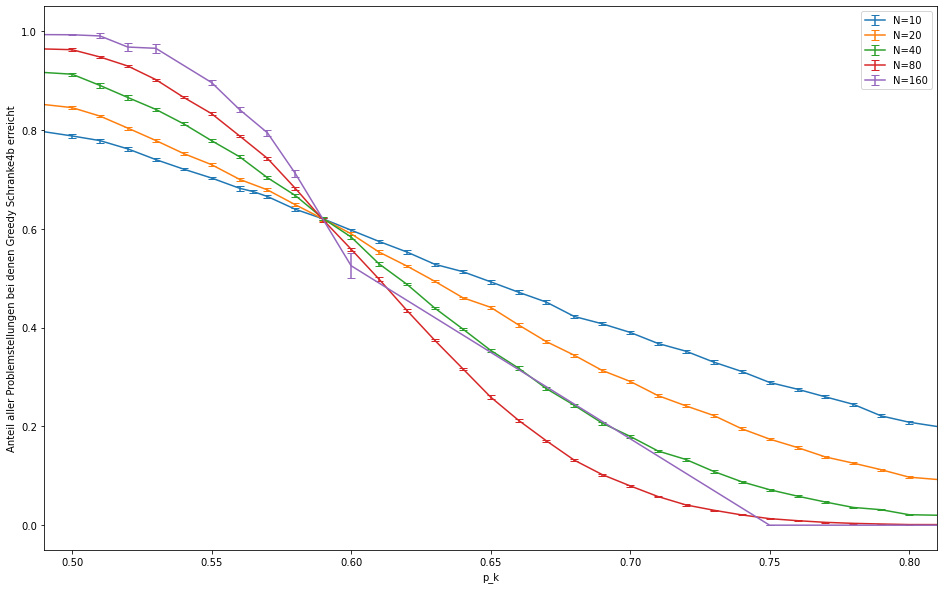

In [7]:
fig, ax = plt.subplots(figsize=(16,10))
alpha=1.15
alg='Greedy'

ns = sorted(data1.keys())

for n in ns[:-1]:
    
    # bringe lokale und vorausgewertete Daten zusammen
    
    ids, prop = data1[n].check_alg_vs_schranke4b(alg, alpha)[:-1]
    std_dev = list(data1[n].calc_std_deviation(data1[n].check_alg_vs_schranke4b(alg, alpha)[1]))
        
    if n in data1_vor.keys():
        ids += data1_vor[n].check_alg_vs_schranke4b(alg, alpha)[0]
        prop += data1_vor[n].check_alg_vs_schranke4b(alg, alpha)[1]
        std_dev += list(data1_vor[n].calc_std_deviation(data1_vor[n].check_alg_vs_schranke4b(alg, alpha)[1]))
    
    # error, falls die selbe ID mehrfach vorkommt
    if len(set(ids)) != len(ids):
        raise ValueError('ROBERTERROR: Ein ID-Wert kommt mehrfach vor!')
    
    # ids sortieren und den rest dazu mit
    
    prop = [t[1] for t in sorted(zip(ids, prop))]
    std_dev = [t[1] for t in sorted(zip(ids, std_dev))]
    
    ids = sorted(ids)
    
    ax.errorbar(ids, prop, yerr=std_dev, capsize=4, label=f'N={n}')
    
    #ax.scatter(*(data1[n].check_alg_vs_schranke4b(alg, alpha)[:-1]), label=f'N={n}')
    #ax.plot(*data1[n].check_alg_vs_schranke4b(alg, alpha)[:-1], alpha=0.5)

ax.legend()

ax.set_xlabel('p_k')
ax.set_ylabel('Anteil aller Problemstellungen bei denen Greedy Schranke4b erreicht')

ax.set_xlim([0.49,.81])
# ax.set_ylim([0.8, 1.02])
# plt.savefig('pk_uebergang_lp.png')

# berechne (schaetze) Schnittpunkt von zwei Kurven

In [8]:
from shapely.geometry import LineString
a = np.arange(10)
a2 = np.linspace(2,10,7)
b = np.linspace(5,6,10)
b = [4.9, 6, 5.4, 5.6, 5.7, 6.1, 5.1, 7.0, 5.4, 4.9]
c = np.linspace(6, 5.7, 7)

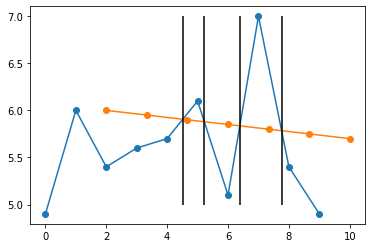

In [9]:
first_line = LineString(np.column_stack((a, b)))
second_line = LineString(np.column_stack((a2, c)))
intersection = first_line.intersection(second_line)

fig, ax = plt.subplots()
ax.plot(a,b, '-o')
ax.plot(a2,c, '-o')

for point in intersection.geoms:
    ax.vlines(point.x, 5, 7, colors='black')

Laeuft so, ist als Fkt. in auswertung.py implementiert

## berechne die Schnittpunkte der verschiedenen Kurven

In [8]:
ns = sorted(d_ids.keys())

schnittpunkte = []

for i, n in enumerate(ns[:-1]):
    schnittpunkte.append(auswertung_ma.calc_schnittpunkte(d_ids[n], d_props[n], d_ids[ns[i+1]], d_props[ns[i+1]]))

In [9]:
schnittpunkte

[None,
 (0.6289999999999999, 0.8853360000000001),
 (0.6346451612903226, 0.877338193548387),
 ([0.5672937293729371,
   0.5814525139664803,
   0.5124489795918368,
   0.5226618705035971,
   0.5729726899218562],
  [0.9653960396039605,
   0.9525782122905029,
   0.9887755102040816,
   0.9863309352517986,
   0.9611955208249414])]

In [16]:
i = auswertung_ma.calc_schnittpunkte(d_ids[40], d_props[40], d_ids[80], d_props[80])
print(i)

GEOMETRYCOLLECTION (LINESTRING (0 1, 0.1 1), LINESTRING (0.1 1, 0.25 1), POINT (0.6052723112128147 0.9163505720823798))


In [20]:
import shapely

In [12]:
for geo in i.geoms:
    print(geo)

LINESTRING (0 1, 0.1 1)
LINESTRING (0.1 1, 0.25 1)
POINT (0.6052723112128147 0.9163505720823798)


In [23]:
a = shapely.geometry.GeometryCollection([i.geoms[2]])

In [24]:
print(a)

GEOMETRYCOLLECTION (POINT (0.6052723112128147 0.9163505720823798))


In [26]:
[g for g in i.geoms if not isinstance(g, shapely.geometry.LineString)]

In [7]:
data1[80].calc_statistic_size()

,stat_size
ids,
0.00,200
0.10,400
0.25,600
0.50,4600
0.51,400
0.52,400
0.53,400
0.54,4000
0.55,4400


In [1]:
pt = r'D:\Uni\Masterarbeit\Daten\KFC2\1_scenario\KFC2_80_nodes_1_scenarios'
%run D:\uni\Masterarbeit\Code\auswertung\vorauswertung.py D:\Uni\Masterarbeit\Daten\KFC2\1_scenario\KFC2_80_nodes_1_scenarios p -2

Namespace(path_HO='D:\\Uni\\Masterarbeit\\Daten\\KFC2\\1_scenario\\KFC2_80_nodes_1_scenarios', id='p', id_index=-2, read_tracking=False, read_lp=False)
Lese die TrackingDaten ein...
fertig!
